# Summary

## 1. We have a model that recieves 416x416x3 picture as input and returns the same picture.
## 2. This square model works correctly in both iOS11 and iOS12.
## 3. We convert square model so that it recieves 740x416x3 picture as input.
## 4. This rectangle model returns incorrect output in iOS12 (but works correctly in iOS11).

# Contents
## [1. Create and train model](#section1)
## [2. Convert to CoreML](#section2)
## [3. Load image](#section3)
## [4.  Make predictions: square model](#section4)
## [5.  Make predictions: rectangle model](#section5) The problem appears [here](#section5.3)

# 0. Imports

In [1]:
%autosave 5

Autosaving every 5 seconds


In [2]:
import os
import sys
os.environ['CUDA_VISIBLE_DEVICES'] = ''

import coremltools

from keras.models import Model
from keras.layers import Conv2D, Input
from keras.optimizers import Adam

from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
python_model_path = 'identity_model.hdf5'
coreml_model_path = 'identity_model.mlmodel'
coreml_model_path_rect = 'identity_model_rect.mlmodel'

<a id='section1'></a>
# 1. Create identity model (python)

## 1.1. This model recieves 416x416x3 picture as input and is supposed to output the same picture.

In [3]:
def get_identity_model(h, w):

    inp = Input(shape=(h, w, 3))
    out = Conv2D(filters=3, kernel_size=(1,1), kernel_initializer='ones')(inp)

    model = Model([inp], [out])

    return model

In [4]:
model = get_identity_model(416, 416)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 416, 416, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 416, 416, 3)       12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [5]:
X_true = np.random.random(size=(100, 416, 416, 3))
y_true = X_true

## 1.2. Train the model so it outputs the same picture as input.

In [26]:
model.compile(optimizer=Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss="mse")

In [27]:
model.fit(X_true, y_true, epochs=10000)

Epoch 1/10000
100/100 [==============================] - 8s 82ms/step - loss: 1.1103
Epoch 2/10000
100/100 [==============================] - 5s 54ms/step - loss: 0.9136
Epoch 3/10000
100/100 [==============================] - 6s 56ms/step - loss: 0.7395
Epoch 4/10000
100/100 [==============================] - 5s 52ms/step - loss: 0.5886
Epoch 5/10000
100/100 [==============================] - 5s 46ms/step - loss: 0.4608
Epoch 6/10000
100/100 [==============================] - 5s 52ms/step - loss: 0.3557
Epoch 7/10000
100/100 [==============================] - 5s 52ms/step - loss: 0.2717
Epoch 8/10000
100/100 [==============================] - 5s 52ms/step - loss: 0.2066
Epoch 9/10000
100/100 [==============================] - 5s 52ms/step - loss: 0.1583
Epoch 10/10000
100/100 [==============================] - 5s 49ms/step - loss: 0.1238
Epoch 11/10000
100/100 [==============================] - 4s 44ms/step - loss: 0.1005
Epoch 12/10000
100/100 [==============================] - 4s 41

100/100 [==============================] - 4s 37ms/step - loss: 1.5804e-04
Epoch 189/10000
100/100 [==============================] - 4s 37ms/step - loss: 1.5125e-04
Epoch 190/10000
100/100 [==============================] - 4s 37ms/step - loss: 1.4473e-04
Epoch 191/10000
100/100 [==============================] - 4s 37ms/step - loss: 1.3847e-04
Epoch 192/10000
100/100 [==============================] - 4s 36ms/step - loss: 1.3245e-04
Epoch 193/10000
100/100 [==============================] - 4s 36ms/step - loss: 1.2667e-04
Epoch 194/10000
100/100 [==============================] - 4s 41ms/step - loss: 1.2113e-04
Epoch 195/10000
100/100 [==============================] - 4s 43ms/step - loss: 1.1580e-04
Epoch 196/10000
100/100 [==============================] - 4s 40ms/step - loss: 1.1069e-04
Epoch 197/10000
100/100 [==============================] - 4s 36ms/step - loss: 1.0579e-04
Epoch 198/10000
100/100 [==============================] - 4s 36ms/step - loss: 1.0109e-04
Epoch 199/10000

100/100 [==============================] - 5s 49ms/step - loss: 2.8212e-09
Epoch 369/10000
100/100 [==============================] - 5s 53ms/step - loss: 2.6051e-09
Epoch 370/10000
100/100 [==============================] - 6s 56ms/step - loss: 2.4064e-09
Epoch 371/10000
100/100 [==============================] - 5s 53ms/step - loss: 2.2219e-09
Epoch 372/10000
100/100 [==============================] - 5s 52ms/step - loss: 2.0504e-09
Epoch 373/10000
100/100 [==============================] - 5s 52ms/step - loss: 1.8915e-09
Epoch 374/10000
100/100 [==============================] - 5s 53ms/step - loss: 1.7460e-09
Epoch 375/10000
100/100 [==============================] - 5s 48ms/step - loss: 1.6106e-09
Epoch 376/10000
100/100 [==============================] - 5s 54ms/step - loss: 1.4853e-09
Epoch 377/10000
100/100 [==============================] - 5s 52ms/step - loss: 1.3687e-09
Epoch 378/10000
100/100 [==============================] - 5s 53ms/step - loss: 1.2618e-09
Epoch 379/10000

100/100 [==============================] - 4s 44ms/step - loss: 1.8008e-13
Epoch 549/10000
100/100 [==============================] - 5s 55ms/step - loss: 1.7643e-13
Epoch 550/10000
100/100 [==============================] - 6s 63ms/step - loss: 1.5996e-13
Epoch 551/10000
100/100 [==============================] - 6s 60ms/step - loss: 1.5599e-13
Epoch 552/10000
100/100 [==============================] - 8s 77ms/step - loss: 1.6282e-13
Epoch 553/10000
100/100 [==============================] - 5s 52ms/step - loss: 1.5869e-13
Epoch 554/10000
100/100 [==============================] - 4s 44ms/step - loss: 1.6194e-13
Epoch 555/10000
100/100 [==============================] - 4s 42ms/step - loss: 1.5904e-13
Epoch 556/10000
100/100 [==============================] - 4s 43ms/step - loss: 1.5880e-13
Epoch 557/10000
100/100 [==============================] - 4s 41ms/step - loss: 1.5993e-13
Epoch 558/10000
100/100 [==============================] - 4s 41ms/step - loss: 1.5947e-13
Epoch 559/10000

100/100 [==============================] - 4s 42ms/step - loss: 7.6352e-14
Epoch 729/10000
100/100 [==============================] - 4s 40ms/step - loss: 7.5933e-14
Epoch 730/10000
100/100 [==============================] - 4s 42ms/step - loss: 7.5478e-14
Epoch 731/10000
100/100 [==============================] - 4s 40ms/step - loss: 7.5667e-14
Epoch 732/10000
100/100 [==============================] - 4s 45ms/step - loss: 7.6242e-14
Epoch 733/10000
100/100 [==============================] - 4s 39ms/step - loss: 7.6470e-14
Epoch 734/10000
100/100 [==============================] - 4s 38ms/step - loss: 7.6290e-14
Epoch 735/10000
100/100 [==============================] - 4s 37ms/step - loss: 7.6200e-14
Epoch 736/10000
100/100 [==============================] - 4s 37ms/step - loss: 7.6229e-14
Epoch 737/10000
100/100 [==============================] - 4s 36ms/step - loss: 7.6262e-14
Epoch 738/10000
100/100 [==============================] - 4s 36ms/step - loss: 7.6276e-14
Epoch 739/10000

KeyboardInterrupt: 

In [103]:
model.save_weights(python_model_path)

## 1.3. Sanity check: the model returns its input with 1e-3 margin of error.

In [28]:
pred = model.predict(X_true)
X_true.shape, pred.shape

((100, 416, 416, 3), (100, 416, 416, 3))

In [33]:
np.allclose(X_true, pred, rtol=1e-3, atol=1e-3)

True

<a id='section2'></a>
# 2. Convert to CoreML

## 2.1. Convert square model to CoreML.

In [7]:
model.load_weights(python_model_path)

In [8]:
coreml_model = coremltools.converters.keras.convert(model,
                                                    input_names=['image'],
                                                    image_input_names='image',
                                                    image_scale=1)

coreml_model.save(coreml_model_path)

0 : input_1, <keras.engine.topology.InputLayer object at 0x1090475d0>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x1085ec250>


## 2.2. Create model with 740x416x3 input. Load identity weights. Convert to CoreML.

In [13]:
model_rect = get_identity_model(740, 416)
model_rect.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 740, 416, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 740, 416, 3)       12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_rect.load_weights(python_model_path)

In [15]:
coreml_model = coremltools.converters.keras.convert(model_rect,
                                                    input_names=['image'],
                                                    image_input_names='image',
                                                    image_scale=1)

coreml_model.save(coreml_model_path_rect)

0 : input_2, <keras.engine.topology.InputLayer object at 0x12fb7bd50>
1 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x12fb7be50>


<a id='section3'></a>
# 3. Load image

## 3.1. Load (1400, 800) image and crop (416, 416) square.

In [41]:
img_path = 'neptune.jpg'
img_pil = Image.open(img_path).convert('RGB')

In [42]:
img_pil_square = img_pil.crop((0, 0, 416, 416))
img_np_square = np.array(img_pil_square)

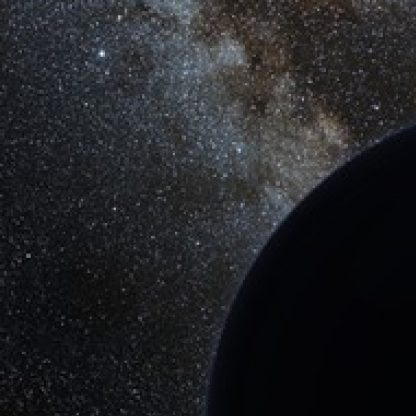

In [43]:
img_pil_square

In [44]:
img_pil_square.size, np.max(img_np_square), np.min(img_np_square)

((416, 416), 255, 0)

## 3.2. Load (1400, 800) image and crop (740, 416) rectangle.

In [47]:
img_pil_rect = img_pil.crop((0, 0, 416, 740))
img_np_rect = np.array(img_pil_rect)

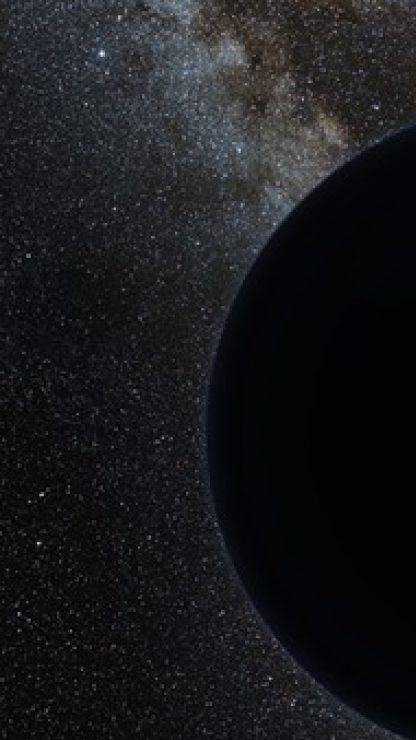

In [48]:
img_pil_rect

In [49]:
img_pil_rect.size, np.max(img_np_rect), np.min(img_np_rect)

((416, 740), 255, 0)

<a id='section4'></a>
# 4. Make predictions: square model

## Works correctly in both iOS11 and iOS12.

### We ran tests in iOS11 and iOS12 in Swift playground (code in repo).

## 4.1. Predict with python.

In [50]:
model.load_weights(python_model_path)

In [51]:
pred_python = model.predict(np.expand_dims(img_np_square, 0))

In [52]:
pred_python.shape

(1, 416, 416, 3)

In [54]:
np.max(pred_python), np.min(pred_python)

(255.00021, -4.1158575e-07)

In [55]:
np.clip(pred_python, 0, 255, pred_python);

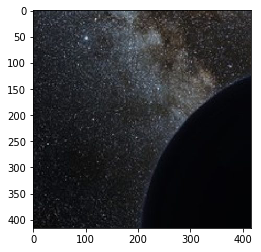

In [56]:
plt.imshow(pred_python[0]/255.)

## 4.2. Predict with CoreML.

In [57]:
loaded_coreml_model = coremltools.models.MLModel(coreml_model_path)

In [59]:
pred_coreml = loaded_coreml_model.predict({'image': img_pil_square})['output1']
pred_coreml.shape

(3, 416, 416)

In [61]:
np.max(pred_coreml), np.min(pred_coreml)

(255.00021362304688, -4.1158574504152057e-07)

In [62]:
np.clip(pred_coreml, 0, 255, pred_coreml);

In [63]:
pred_coreml_reshaped = np.rollaxis(pred_coreml, 0, 3)
pred_coreml_reshaped.shape

(416, 416, 3)

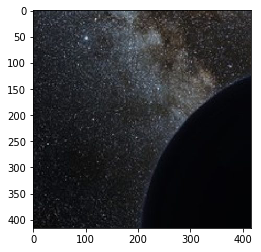

In [64]:
plt.imshow(pred_coreml_reshaped/255.)

## 4.3. Predict with Swift iOS12.
### We ran tests in iOS12 in Swift playground (code in repo).

In [100]:
with open('square_iOS12.bin') as f:
    bin_data = np.fromfile(f, dtype=float)
    pred_xcode = bin_data.reshape(3,416,416)

In [32]:
np.max(pred_xcode), np.min(pred_xcode)

(1.0000003576278687, -4.21046735255004e-07)

In [33]:
np.clip(pred_xcode, 0, 1, pred_xcode);

In [34]:
pred_xcode_reshaped = np.rollaxis(pred_xcode, 0, 3)

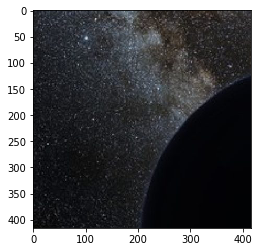

In [35]:
plt.imshow(pred_xcode_reshaped)

<a id='section5'></a>
# 5. Make predictions: rectangle model
# The problem appears here.

## Works correclty in iOS11 but not iOS12.

### We ran tests in iOS11 and iOS12 in Swift playground (code in repo).

## 5.1. Predict with python.

In [ ]:
model_rect.load_weights(python_model_path)

In [66]:
pred_python_rect = model_rect.predict(np.expand_dims(img_np_rect, 0))

In [67]:
pred_python_rect.shape

(1, 740, 416, 3)

In [68]:
np.max(pred_python_rect), np.min(pred_python_rect)

(255.00021, -4.210961e-07)

In [69]:
np.clip(pred_python_rect, 0, 255, pred_python_rect);

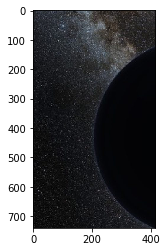

In [70]:
plt.imshow(pred_python_rect[0]/255.)

## 5.2. Predict with CoreML.

In [84]:
loaded_coreml_model_rect = coremltools.models.MLModel(coreml_model_path_rect)

In [85]:
pred_coreml_rect = loaded_coreml_model_rect.predict({'image': img_pil_rect})['output1']
pred_coreml_rect.shape

(3, 740, 416)

In [86]:
np.max(pred_coreml_rect), np.min(pred_coreml_rect)

(255.00021362304688, -4.2109610376428463e-07)

In [87]:
np.clip(pred_coreml_rect, 0, 255, pred_coreml_rect);

In [88]:
pred_coreml_rect_reshaped = np.rollaxis(pred_coreml_rect, 0, 3)
pred_coreml_rect_reshaped.shape

(740, 416, 3)

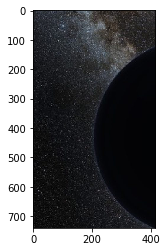

In [91]:
plt.imshow(pred_coreml_rect_reshaped/255.)

<a id='section5.3'></a>
## 5.3. Predict with Swift iOS12.
### We ran tests in iOS12 in Swift playground (code in repo).

In [101]:
with open('rect_iOS12.bin') as f:
    bin_data = np.fromfile(f, dtype=float)
    pred_xcode = bin_data.reshape(3,740,416)

In [95]:
np.max(pred_xcode), np.min(pred_xcode)

(0.8549023270606995, -4.2109610376428463e-07)

In [97]:
np.clip(pred_xcode, 0, 1, pred_xcode);

In [98]:
pred_xcode_reshaped = np.rollaxis(pred_xcode, 0, 3)

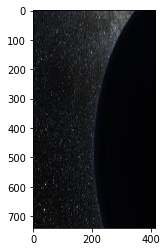

In [99]:
plt.imshow(pred_xcode_reshaped)